## Artificial Neural Network (ANN) Implementation for Image Classification

In [1]:
# Import library
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, optimizers
import pandas as pd
import matplotlib.pyplot as plt

2023-11-18 11:57:16.269760: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-18 11:57:18.153313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-18 11:57:18.153661: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [3]:
# Define the ANN model
model = models.Sequential()

# Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Fully connected layer with 64 neurons and ReLU activation
model.add(layers.Dense(64, activation = 'relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(layers.Dense(1, activation = 'sigmoid'))

2023-11-18 11:57:21.406031: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-11-18 11:57:21.412720: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-11-18 11:57:21.412782: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-20231118-173352): /proc/driver/nvidia/version does not exist
2023-11-18 11:57:21.416082: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow 

In [2]:
# Load the CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize the image data
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Show model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
# Compile the ANN model with binary cross-entropy loss and binary accuracy metric
model.compile(
    loss = 'binary_crossentropy',
    optimizer = optimizers.Adam(epsilon=0.01),
    metrics = ['binary_accuracy']
)

In [6]:
# Train the ANN model
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),epochs=25)

Epoch 1/25


2023-11-18 11:57:22.872823: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 78s 49ms/step - loss: -7491227746304.0000 - binary_accuracy: 0.1000 - val_loss: -43264837156864.0000 - val_binary_accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 77s 49ms/step - loss: -318347942035456.0000 - binary_accuracy: 0.1000 - val_loss: -853084255289344.0000 - val_binary_accuracy: 0.1000
Epoch 3/25
1563/1563 [==============================] - 76s 49ms/step - loss: -2228562966872064.0000 - binary_accuracy: 0.1000 - val_loss: -4263257284018176.0000 - val_binary_accuracy: 0.1000
Epoch 4/25
1563/1563 [==============================] - 74s 48ms/step - loss: -7986544300261376.0000 - binary_accuracy: 0.1000 - val_loss: -12924903065911296.0000 - val_binary_accuracy: 0.1000
Epoch 5/25
1563/1563 [==============================] - 75s 48ms/step - loss: -20642987214110720.0000 - binary_accuracy: 0.1000 - val_loss: -30399765636186112.0000 - val_binary_accuracy: 0.1000
Epoch 6/25
1563/1563 [==============================] -

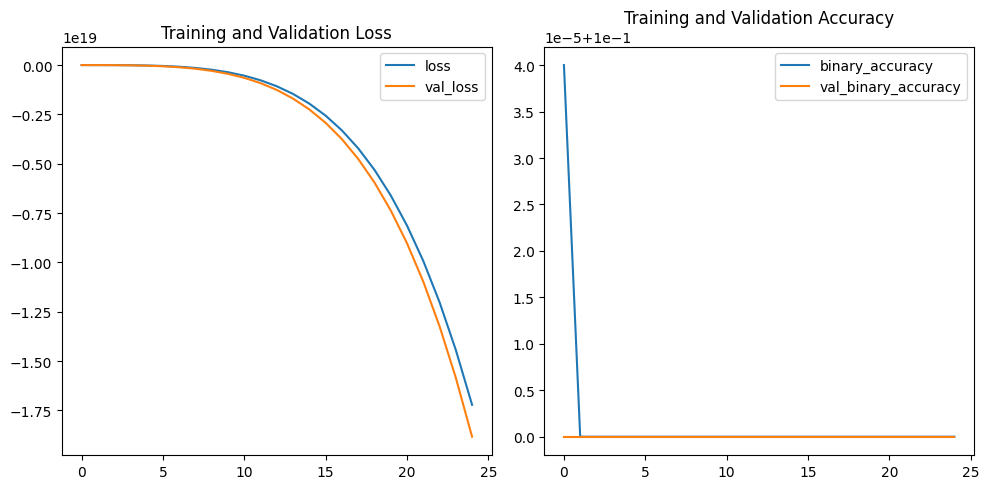

In [7]:
# Plot training history for ANN model
history_frame = pd.DataFrame(history.history)

# Plotting Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
history_frame.loc[:, ['loss', 'val_loss']].plot(ax=plt.gca())
plt.title('Training and Validation Loss')

# Plotting Accuracy
plt.subplot(1, 2, 2)
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=plt.gca())
plt.title('Training and Validation Accuracy')

plt.tight_layout()
plt.show()

313/313 [==============================] - 3s 8ms/step - loss: -18834372500035469312.0000 - binary_accuracy: 0.1000
Test accuracy: 0.10000000149011612


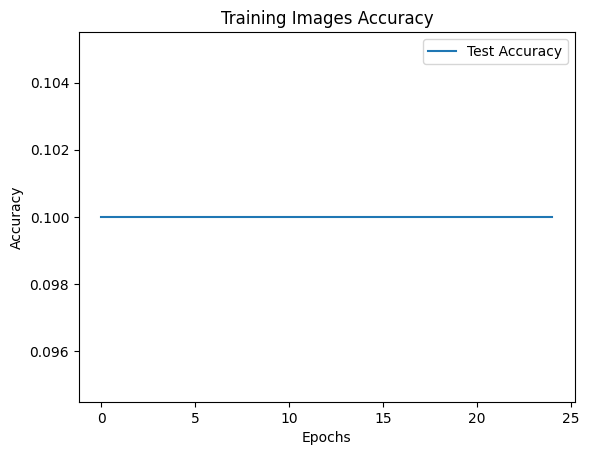

In [8]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plotting the test accuracy
plt.plot(history.history['val_binary_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Images Accuracy')
plt.show()